In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import os
import glob
import cv2
import random

In [2]:
def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.COLOR_BGR2RGB)
    
	return image

In [3]:
url = 'https://firebasestorage.googleapis.com/v0/b/signboard-translation-306303.appspot.com/o/images%2FScreenshot%202021-03-01%20120521.png?alt=media&token=989d76f0-a7c0-47d5-ae2b-9c55d6f525bd'

image = url_to_image(url)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(187, 345, 3)


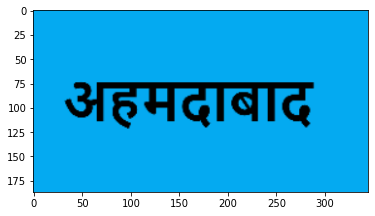

In [4]:
print(RGB_img.shape)
plt.imshow(RGB_img)
plt.show()

In [5]:
def crop(img):
    if img.shape[0]>600:
        img=img[150:-30,:-50,:]
    return img    

def erosion(image_binary):
    kernel = np.ones((5,5), np.uint8)
    erode=cv2.erode(image_binary,kernel)
    return erode

In [6]:
# Crop Image
image = crop(RGB_img)

# Convert Image into Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)

# Eroded Image
erode=erosion(image_binary)

# Making Contours
contours, hierarchy = cv2.findContours(erode, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
mask = list(hierarchy[0][:,-1]<=-1)
ids = np.arange(len(hierarchy[0]))
mid = ids[mask]
new_cnts = [contours[i] for i in mid]
cnts_temp = [i for i in new_cnts if cv2.contourArea(i)>1000.0]

images =[]

for sr, i in enumerate(cnts_temp):
    x, y, w, h = cv2.boundingRect(i)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
    images.append(image[y:y+h,x:x+w])

    


(187, 345)


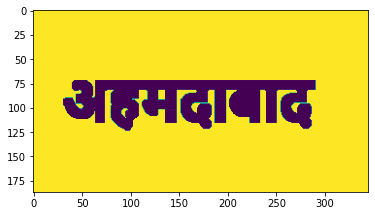

In [7]:
print(erode.shape)
plt.imshow(erode)
plt.show()

In [8]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [9]:
data=[]
for i in images:
    text = pytesseract.image_to_string(i, lang = 'hin')
    text = text.strip()
    data.append(text)

In [10]:
print(data)

['अहमदाबाद']
